# **Customer Purchase & Reorder Behavior Analysis in Grocery Retail**
# **End-to-End Data Analysis Project using Python**



## 1. Project Overview

#### This project analyzes customer purchasing behavior and product reorder patterns in a grocery retail dataset. The goal is to understand customer buying habits, reorder trends, product demand, and time-based ordering patterns to generate meaningful business insights.

## 2. Business Objective

#### 1.   Analyze customer ordering behavior
#### 2.  Identify factors affecting product reorders
#### 3.  Study department and aisle performance
#### 4.  Understand time-based order trends
#### 5.  Provide business recommendations to improve sales and retention

## 3. Tools & Technologies Used
#### - Python
#### - Pandas
#### - Matplotlib
#### - Seaborn
#### - Jupyter Notebook


## 4. Data Loading

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df= pd.read_csv(r"C:\Users\ankit\OneDrive\Desktop\All Project Of Data Scientist\sample_data.csv")

## 5. Data Understanding

In [4]:
df.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department,is_first_order,order_size,total_orders_by_user,product_reorder_rate
0,2490666,8195,5,1,Paper Towels,54,17,134461,prior,48,3,17,3.0,paper goods,household,0,5,58,0.579359
1,1946242,10831,7,1,Yobaby Organic Plain Yogurt,120,16,163156,prior,12,4,18,6.0,yogurt,dairy eggs,0,8,34,0.800888
2,1396938,24852,1,1,Banana,24,4,20685,prior,4,0,8,13.0,fresh fruits,produce,0,21,10,0.843501
3,2029275,25681,14,0,Smooth Seven Nut & Seed Butter,88,13,13567,prior,6,5,13,30.0,spreads,pantry,0,15,6,0.516949
4,309701,41065,9,1,Organic Yellow Squash,83,4,11588,prior,42,0,11,5.0,fresh vegetables,produce,0,21,99,0.566070


In [5]:
df.shape


(25000, 19)

In [6]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle', 'department', 'is_first_order',
       'order_size', 'total_orders_by_user', 'product_reorder_rate'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                25000 non-null  int64  
 1   product_id              25000 non-null  int64  
 2   add_to_cart_order       25000 non-null  int64  
 3   reordered               25000 non-null  int64  
 4   product_name            25000 non-null  object 
 5   aisle_id                25000 non-null  int64  
 6   department_id           25000 non-null  int64  
 7   user_id                 25000 non-null  int64  
 8   eval_set                25000 non-null  object 
 9   order_number            25000 non-null  int64  
 10  order_dow               25000 non-null  int64  
 11  order_hour_of_day       25000 non-null  int64  
 12  days_since_prior_order  25000 non-null  float64
 13  aisle                   25000 non-null  object 
 14  department              25000 non-null

In [8]:
df.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,is_first_order,order_size,total_orders_by_user,product_reorder_rate
count,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1.708601e+06,25652.001800,8.278160,0.594920,70.94016,9.962480,103041.743920,17.247440,2.74408,13.434000,10.426440,0.062360,15.562680,33.116080,0.589967
std,9.872848e+05,14040.699724,7.080457,0.490917,38.14345,6.273335,59598.977226,17.699278,2.08531,4.252384,8.937316,0.241813,9.412665,25.099449,0.150169
min,2.800000e+01,9.000000,1.000000,0.000000,1.00000,1.000000,5.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,8.559250e+05,13802.000000,3.000000,0.000000,31.00000,4.000000,51835.500000,5.000000,1.00000,10.000000,4.000000,0.000000,9.000000,13.000000,0.507376
50%,1.699201e+06,25424.000000,6.000000,1.000000,83.00000,9.000000,102916.000000,11.000000,3.00000,13.000000,7.000000,0.000000,14.000000,26.000000,0.610880
75%,2.567461e+06,37919.000000,11.000000,1.000000,107.00000,16.000000,155067.750000,24.000000,5.00000,16.000000,14.000000,0.000000,20.000000,47.000000,0.695103
max,3.421012e+06,49683.000000,88.000000,1.000000,134.00000,21.000000,206203.000000,99.000000,6.00000,23.000000,30.000000,1.000000,116.000000,99.000000,0.875000


## 7. Data Quality Checks

In [9]:
df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
aisle                     0
department                0
is_first_order            0
order_size                0
total_orders_by_user      0
product_reorder_rate      0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
(df['add_to_cart_order'] <= df['order_size']).all()

True

In [12]:
df['order_hour_of_day'].between(0, 23).all()

True

In [13]:
df['reordered'].isin([0, 1]).all()

True

## 8. Business Questions

####  1. Which products are most reordered?
####  2. Which department has highest orders?
####  3. What time do customers order most?
####  4. Which aisle/category performs best?
####  5. How many customers are repeat customers?

### 9. KPI & Business Summary Metrics

In [14]:
tot_orders = df.order_id.nunique()
print("total orders : ",tot_orders)
tot_users = df.user_id.nunique()
print("total users : ",tot_users) 
tot_prod = df.product_id.nunique()
print("total product : " , tot_prod)
tot_depart = df.department_id.nunique()
print("total department : ", tot_depart)
avg_ord_size = round(df.order_size.mean(),2)
print("avg order size : ", avg_ord_size)

total orders :  24866
total users :  21595
total product :  8028
total department :  21
avg order size :  15.56


## 10. Exploratory Data Analysis

## *Product & Sales Analysis*

### [10.1]  Top Selling Product

In [15]:
top_prod = df.product_name.value_counts().head(10)

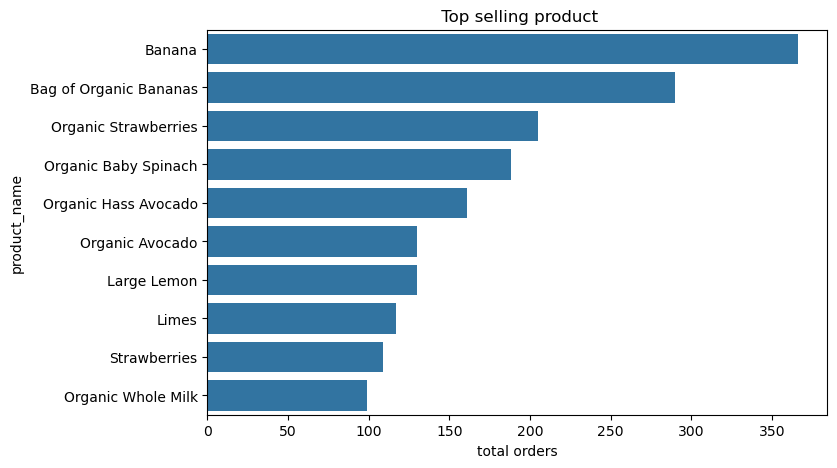

In [16]:
plt.figure(figsize = (8,5))
sns.barplot(x = top_prod.values, y = top_prod.index)
plt.xlabel("total orders")
plt.title(" Top selling product")
plt.show()

### [10.2] orders by department

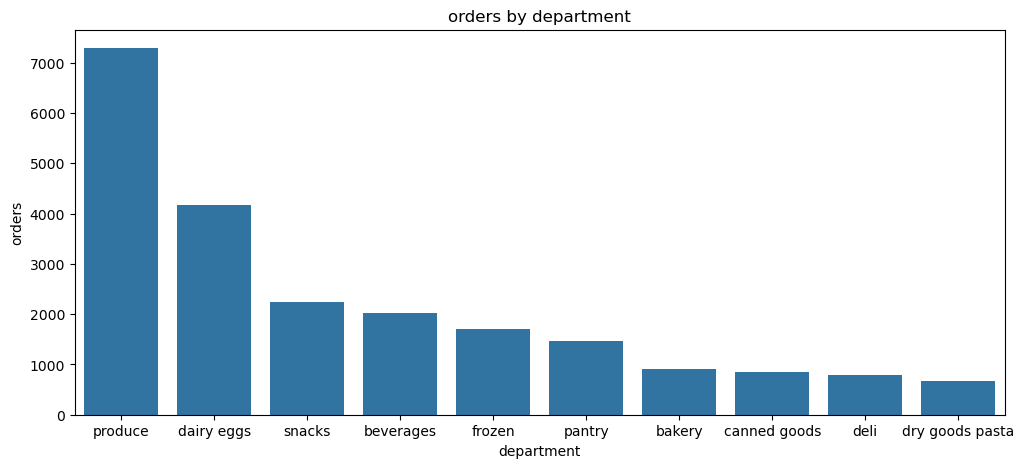

In [17]:
top_depart = df.department.value_counts().head(10)
plt.figure(figsize = (12,5))
sns.barplot( y= top_depart.values, x = top_depart.index)
plt.ylabel("orders")
plt.title("orders by department")
plt.show()

### [10.3] Top Selling Aisles

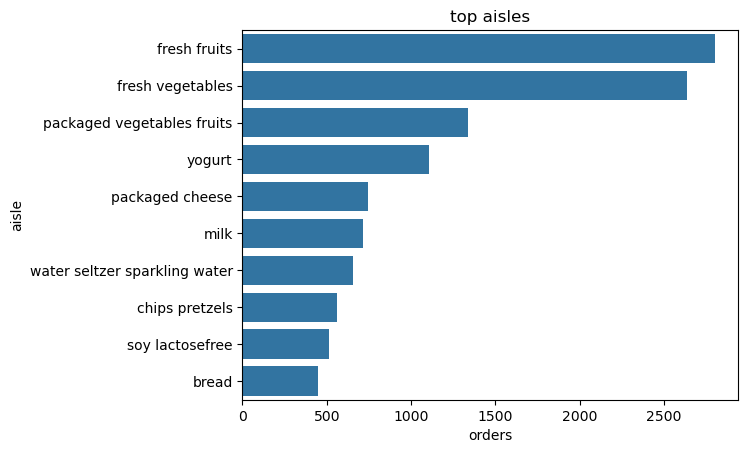

In [18]:
top_aisle = df['aisle'].value_counts().head(10)
sns.barplot(y = top_aisle.index, x = top_aisle.values)
plt.title("top aisles")
plt.xlabel("orders")
plt.show()

## *Reorder & Product Loyalty Analysis*

### [10.4] Overall Reorder vs New Orders

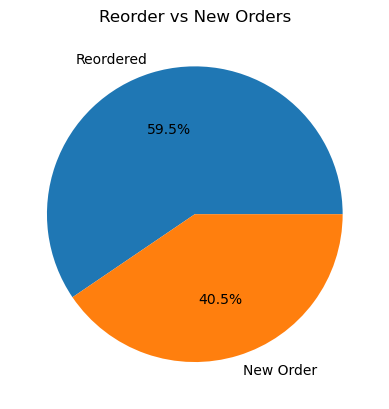

In [19]:
reordered = df.reordered.value_counts()

plt.pie(reordered, labels=["Reordered","New Order"], autopct='%1.1f%%')
plt.title("Reorder vs New Orders")
plt.show()


### [10.5]  Top Reordered Products

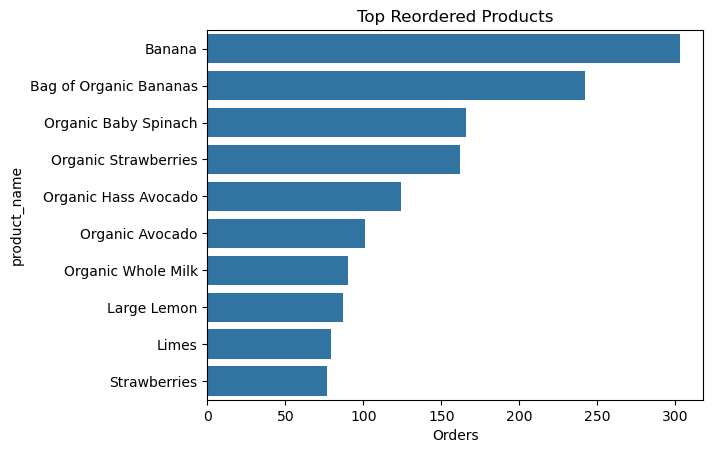

In [20]:
top_reorderes = df[df.reordered == 1]["product_name"].value_counts().head(10)

sns.barplot(x=top_reorderes.values, y=top_reorderes.index)
plt.title("Top Reordered Products")
plt.xlabel("Orders")
plt.show()


### [10.6] Top Products by Reorder Rate

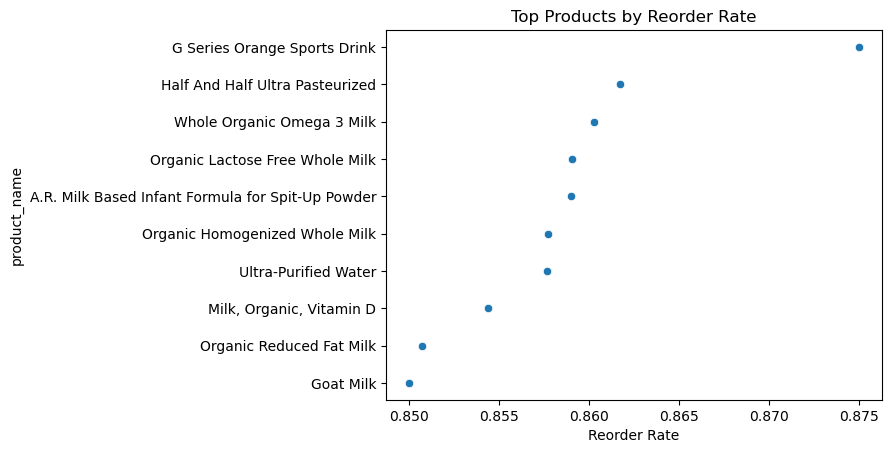

In [21]:
prod_reorder_rate = df.groupby("product_name")["product_reorder_rate"].mean().sort_values(ascending=False).head(10)

sns.scatterplot(y=prod_reorder_rate.index, x=prod_reorder_rate.values)
plt.title("Top Products by Reorder Rate")
plt.xlabel("Reorder Rate")
plt.show()


## *Time-Based Order Analysis*

### [10.7]  Orders by Day of Week

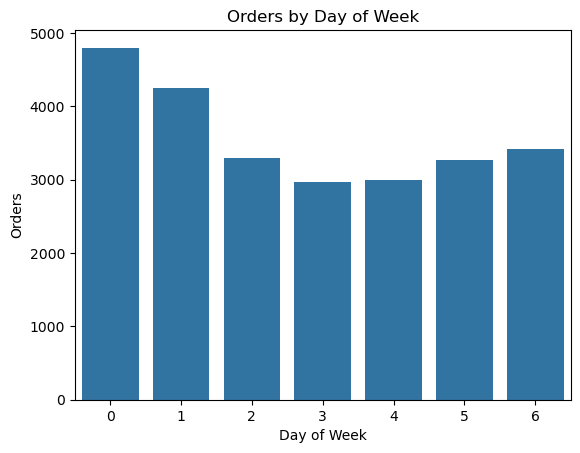

In [22]:
ord_d_w = df.order_dow.value_counts()

sns.barplot(x=ord_d_w.index, y=ord_d_w.values)
plt.ylabel("Orders")
plt.xlabel("Day of Week")
plt.title("Orders by Day of Week")
plt.show()


### [10.8]  Orders by Hour (Peak Time)

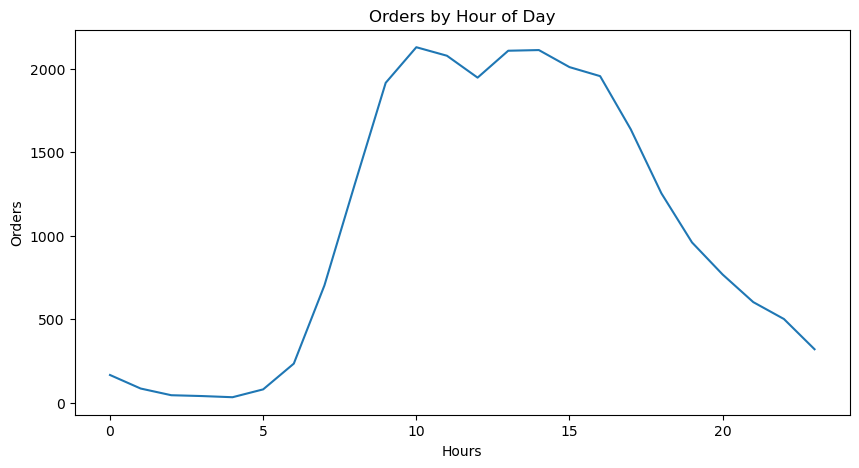

In [23]:
ord_by_hours = df.order_hour_of_day.value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=ord_by_hours.index, y=ord_by_hours.values)
plt.title("Orders by Hour of Day")
plt.ylabel("Orders")
plt.xlabel("Hours")
plt.show()


### [10.9] Days Between Orders

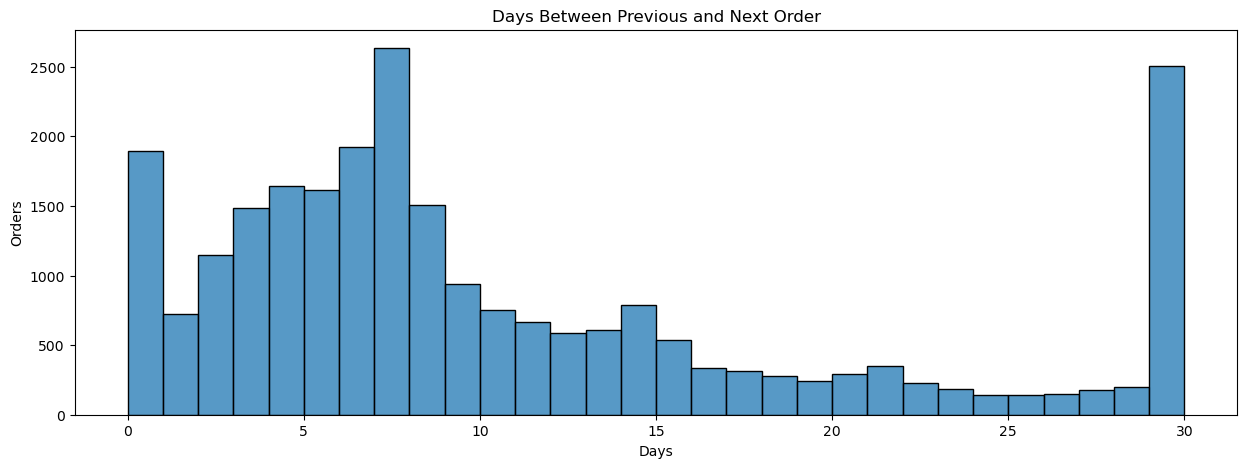

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(df.days_since_prior_order, bins=30)
plt.xlabel("Days")
plt.ylabel("Orders")
plt.title("Days Between Previous and Next Order")
plt.show()

## *Customer Behavior Analysis*

### [10.10]  Top Loyal Customers

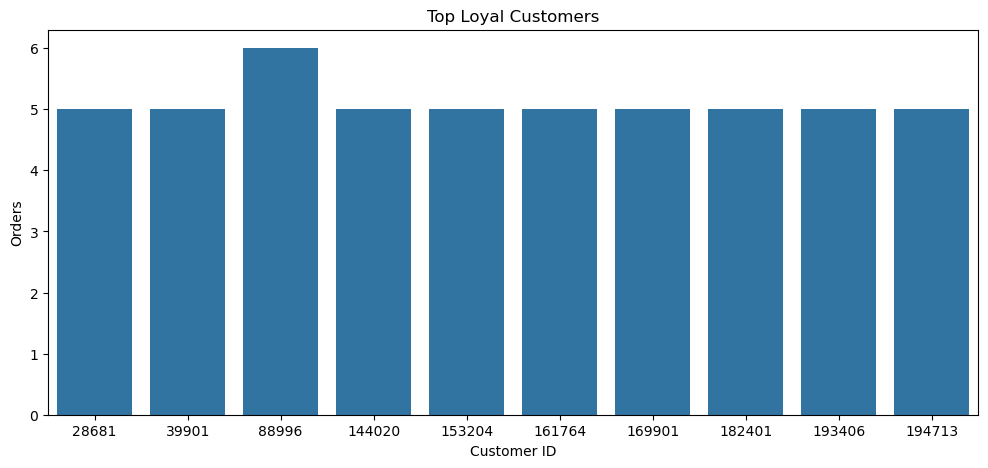

In [25]:
plt.figure(figsize=(12,5))
top_users = df['user_id'].value_counts().head(10)

sns.barplot(x=top_users.index, y=top_users.values)
plt.title("Top Loyal Customers")
plt.ylabel("Orders")
plt.xlabel("Customer ID")
plt.show()


### [10.11]  New vs Repeat Customers

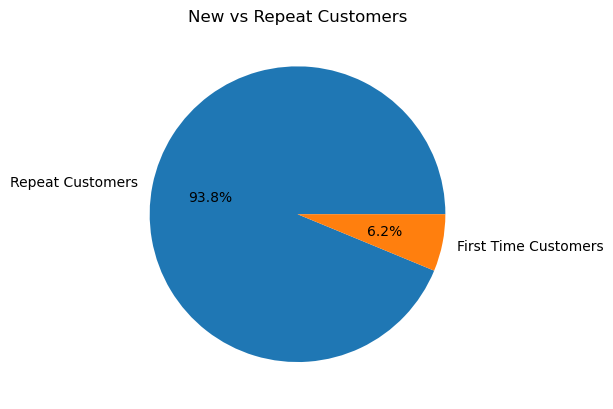

In [26]:
plt.pie(df['is_first_order'].value_counts(),
        labels=["Repeat Customers","First Time Customers"],
        autopct="%1.1f%%")
plt.title("New vs Repeat Customers")
plt.show()


### [10.12] Basket Size Analysis

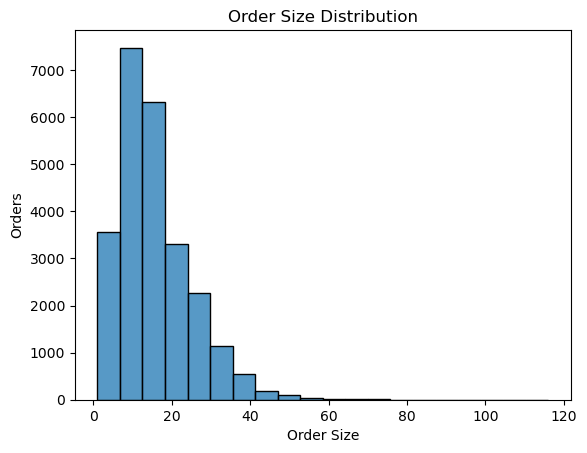

In [27]:
sns.histplot(df.order_size, bins=20)
plt.ylabel("Orders")
plt.xlabel("Order Size")
plt.title("Order Size Distribution")
plt.show()


## [10.13]  Correlation Analysis


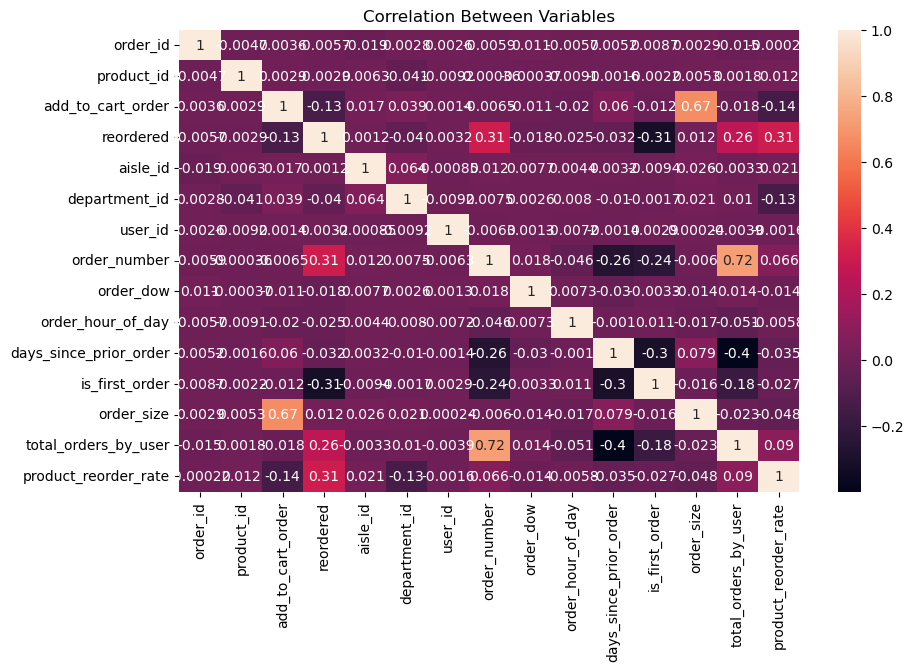

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Between Variables")
plt.show()


## 11.  Key Insights
###
#### - Most sales come from a few high-demand grocery products.
#### - Produce and dairy departments generate highest orders.
#### - Majority of customers are repeat buyers, showing strong retention.
#### - Peak ordering time is afternoon and evening.
#### - Customers with more total orders show higher reorder behavior.
#### - Some products have very high reorder rate indicating strong customer loyalty.


## 12. Business Recommendations
###
#### - Keep high-demand and frequently reordered products always in stock.
#### - Provide discounts or promotions on low reorder products.
#### - Target customers during peak order hours for marketing campaigns.
#### - Focus on loyal customers with membership or reward programs.
#### - Improve visibility of low-performing departments and aisles.


## 13. Final Conclusion

#### This project analyzed customer purchase and reorder behavior in a grocery retail dataset. 
#### The analysis identified top-selling products, reorder trends, customer loyalty patterns, and peak ordering times.

#### The insights gained from this analysis can help grocery businesses improve inventory management, increase customer retention, and optimize marketing strategies. Understanding customer behavior allows businesses to make data-driven decisions and improve overall sales performance.
